In [1]:
#Librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Yahoo finance API
import yfinance as yf

# Módulo propio
from pypt.load_data import get_data
from pypt.pmv import PMV

# Módulo para optimización
from cvxopt import matrix
from cvxopt import solvers


sns.set_theme(font="Times New Roman",font_scale=1)

# Modelo Media Varianza
## selección de acciones

Se escogen 4 acciones de 5 sectores diferentes cada una, los sectores se escogen con base en la situación coyuntural actual por ende se opta por 

 1. Sector energético 
 
 Las empresas que hacen parte del sector energético se espera que tengan un incremento de sus ganancias a causa de la reactivación completa de sus actividades; en especial, gracias al retorno progresivo a las actividades presenciales de empresas y trabajadores se prevee que tanto la oferta de productos energéticos como su demanda se incremente.
 
 2. Sector industrial 
 
 Las empresas que hacen parte del sector Industrial durante 2020 y 2021 se vieron afectadas por las restricciónes de movilidad, la crisis de los contenedores y los costos de transporte incrementaron los costos de los insumos intermedios para la producción de bienes finales de las industria tecnológica y automóviles. 
 
 Se espera que con la demanda insatisfecha en materiales como el silicio, aluminio, germanio; usados en la fabricación de semiconductores, se incrementen las utilidades percibidas por las empresas parte de este sector.
 
 
 3. Sector Salud
 
 A pesar de la aparente disminución en los casos de covid-19, y el avance de los esquemas de vacunación de los diferentes países, se espera que la industria continue reportando ganancias hasta finales de 2022.
 
 4. Sector Real 
 
 Por su dinámica propia, por la reactivación econóica y por la industria de construcción y vivienda.
 
 5. Sector Tecnología
 
 A causa de la normalización en la cadena de suministro se espera que el sector tecnología continúe con su tendencia; no obstante, a causa del retorno a actividades presenciales puede preveerse una disminución en servicios tecnológicos como aplicaciones de reuniones virtuales y conferencias, sin embargo, se ha evidenciado un crecimiento de la demanda de servicios cloud computing, por tal razón empresas como Microsoft, Amazon y Google son relevantes debido a los productos en la nube.
 
 
Los emisores de cada acción se escogen de manera arbitraria, por facilidad en el ejercicio

In [2]:
symbols = [
    "AAPL",
    "MSFT",
    "AMZN",
    "GOOG",
    "XOM",
    "SNP",
    "EC",
    "TPL",
    "PFE",
    "NVS",
    "AZN",
    "JNJ",
    "PLD",
    "AMT",
    "KRG",
    "PSA",
    "BA",
    "CAT",
    "FDX",
    "DAL"  
]

## Yahoo finance API
Se utiliza el método ``prices`` de la clase get_gata() para obtener el precio de las acciones en frecuencia mensual desde 2011-11-30 hasta 2022-01-32, además se utiliza el precio ajustado de cada acción

la clase get_data() es una clase diseñada para facilitar la importación del precio y retornos de las acciones, esto permite su utilización de manera sencilla en varias partes del código, para mayor información use 
    
    help(get_data)

In [3]:
help(get_data)

Help on class get_data in module pypt.load_data:

class get_data(builtins.object)
 |  get_data(symbols, start_date, end_date, frequency=None, type_price='Adj Close')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, symbols, start_date, end_date, frequency=None, type_price='Adj Close')
 |      Miguel Angel Manrique Rodriguez
 |      
 |      Esta clase le permite descargar datos del precio de los instrumentos financieros presentes en Yahoo Finance
 |      
 |      Es un ejercicio educativo para la materia Teoría de Portafolios de la Universidad Externado de Colombia
 |      a cargo del profesor Oscar Reyes
 |      
 |      2022-1S
 |      
 |      Parámetros
 |      ---------------------
 |      symbols: list
 |      
 |              Lista de símbolos o 'Tickets' usados en yahoo finance como nemotécnico de los diferentes 
 |              instrumentos financieros, para mayor información ver la librería yfinance
 |      
 |      start_date: str
 |      
 |                  Fecha ini

## Precios

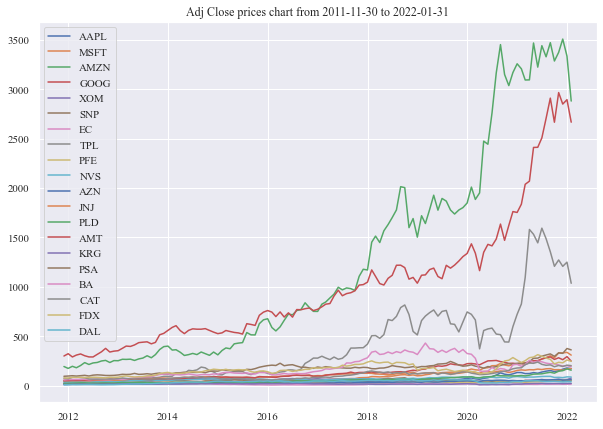

In [4]:
prices = get_data(symbols=symbols,start_date="2011-11-30",end_date="2022-01-31",frequency='M').prices(plot={'draw':True,'standarise':False})

In [5]:
help(get_data.prices)

Help on function prices in module pypt.load_data:

prices(self, plot={'draw': False, 'standarise': False})
    El método prices obtiene los precios de yfinance con los parámetros de la clase get_data
    
    Adeás se utilizan métodos de la librería pandas y de numpy para la manipulación de los 
    dataframes
    
    Parámetros
    ---------------------
    plot : dict
    
        'draw' : bool , default=False
    
            True si se quiere graficar el precio de  symbols
            False si no se quiere graficar el precio de  symbols
    
        'standarise' : bool , default=False
    
            True si se quiere graficar el precio de  symbols estandarizados
            False si no se quiere graficar el precio  de symbols estandarizados
    
    Ejemplo
    ---------------------
    [in]  get_data(symbols=['AAPL','TSLA'],start_date="2021-11-30",end_date="2022-01-31",frequency='M').prices()
    
    [out] 
                        AAPL Adj Close  TSLA Adj Close
        2021-11

## Retornos

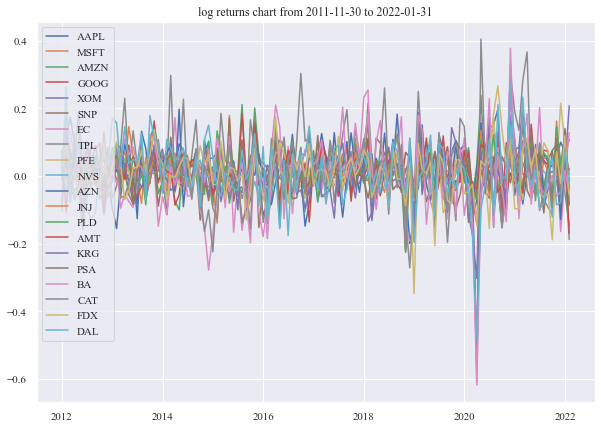

In [6]:
returns = get_data(symbols=symbols,start_date="2011-11-30",end_date="2022-01-31",frequency='M').returns(return_type="log",plot=True)

In [7]:
help(get_data.returns)

Help on function returns in module pypt.load_data:

returns(self, return_type, plot=False)
    El método returns obtiene los retronos de los precios de yfinance con los parámetros 
    de la clase get_data
    
    Además se utilizan métodos de la librería pandas y de numpy para la manipulación de los 
    dataframes
    
    Parámetros
    ---------------------
    return_type : str , default='log'
    
        'log' si se calcula el retorno logarítimco
        'ari' si se calcula el retorno aritmético
    plot : bool, default=False
    
        True si se quiere graficar los retornos
        False si no se quiere graficar los retornos
    
    Ejemplo
    ---------------------
    [in]  get_data(symbols=['AAPL','TSLA'],start_date="2021-11-30",end_date="2022-01-31",frequency='M').returns(return_type='log')
    
    [out] 
                        AAPL Adj Close  TSLA Adj Close
        2021-12-31      0.071603        -0.079968
        2022-01-31      -0.041627       -0.222049
    
    r

## Coeficientes de correlación y correlograma

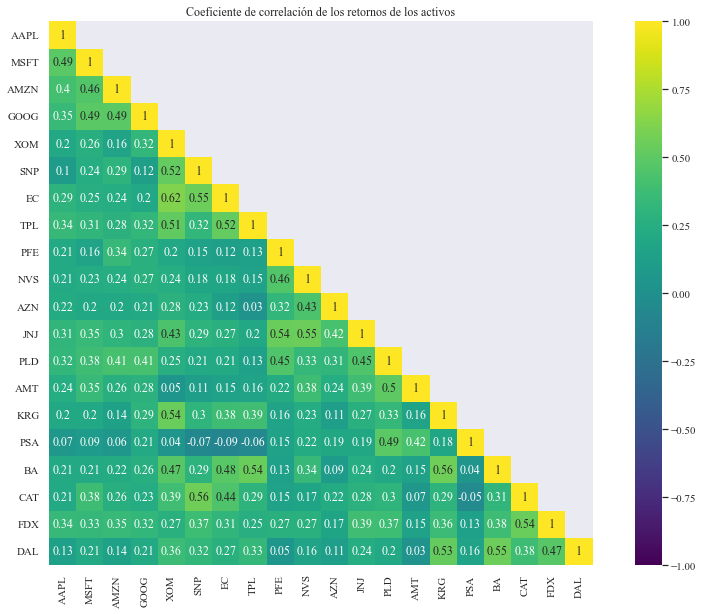

In [8]:
mask = np.ones_like(returns.corr())
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(15,10))
sns.heatmap(round(returns.corr(),2), mask=mask, vmax=1,vmin=-1, square=True, annot=True, cmap="viridis")
plt.title("Coeficiente de correlación de los retornos de los activos")
plt.show()

## Retorno objetivo del portafolio
Se opta por el promedio de los retornos promedio de los activos

In [9]:
Rtarget = np.mean(returns.agg(np.mean)) #retorno objetivo arbitrario 
Rtarget

0.012035130335806015

## Portafolio de mínima varianza global PMVg

Para los ejercicios de diversificación de Markowitz, portafolio óptimo de sharpe, y curva de mercado de capitales se construyó la clase PMV, a pesar de que es un ejercicio académico, se espera que esta clase sea de utilidad tanto para estudiantes como docentes, la explicación práctica de la misma se encuentra en el script notas.ipynb que contiene las notas de clase 

In [10]:
help(PMV)

Help on class PMV in module pypt.pmv:

class PMV(builtins.object)
 |  PMV(returns)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, returns)
 |      Miguel Angel Manrique Rodriguez
 |      
 |      Esta clase le permite calcular el portafolio óptimo de mínima varianza global PMVg,
 |      el portafolio óptimo de sharpe o portafolio tangente de sharpe, y la curva de mercado
 |      de capitales.
 |      
 |      Es un ejercicio educativo para la materia Teoría de Portafolios de la Universidad Externado de Colombia
 |      a cargo del profesor Oscar Reyes
 |      
 |      Parámetros
 |      ------------------------------------------------
 |      
 |      returns: pd.core.frame.Dataframe object
 |      
 |              Data frame de pandas con los retornos de los precios de los activos
 |              para calcular el retorno puede usar get_data().returns(), use
 |              help(get_data.precios)
 |  
 |  mv(self, target_return=None)
 |      El método mv de Mínima Varianza le p

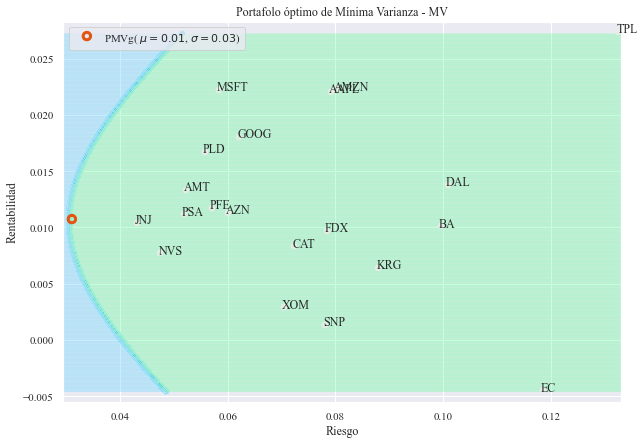

In [11]:
rpmv, sigmapmv ,wpmv  = PMV(returns=returns).mv().pmv
PMV(returns=returns).mv().plot(include_assets=True)

In [12]:
help(PMV.mv)

Help on function mv in module pypt.pmv:

mv(self, target_return=None)
    El método mv de Mínima Varianza le permite calcular el portafolio óptimo de mínima varianza global
    y el portafolio óptimo con rentorno objetivo deseados
    
    
    Parámetros
    ---------------------
    
    target_return : float
    
        Si desea calcular el portafolio óptimo para un retorn objetivo deseado
        utilice target_return y especifique el retorno deseado
    
    
    Valores devueltos (atributos)
    ----------------------------------------------------------------
    sea n el número de acciones
    
        vcov : matriz (n x n) de varianzas y covarianzas 
        corr : matriz (n x n) de coeficientes de correlación de pearson 
        mu   : vector (n,) de retornos promedio 
        var  : vector (n,) de varianzas 
        sigma: vector (n,) de desviaciónes estándar
    
        rpmv : retorno (rentabilidad) del portafolio de mínima varianza global
        sigmapmv : varianza (ries

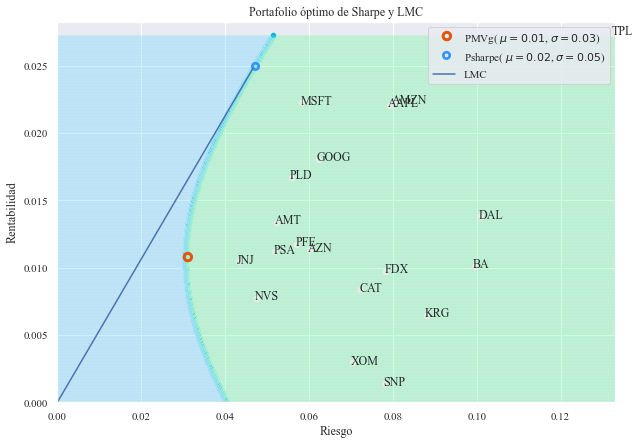

In [13]:
rsharpe, sigmasharpe ,wsharpe = PMV(returns=returns).sharpe().psharpe
PMV(returns=returns).sharpe().plot(lmc=True, include_assets=True)

In [14]:
help(PMV.sharpe)

Help on function sharpe in module pypt.pmv:

sharpe(self)
    El método sharpe de Sharpe le permite calcular el portafolio óptimo de sharpe, o portafolio 
    tangente de sharpe y la linea del mercado de capitales
    
    
    
    Valores devueltos (atributos)
    ----------------------------------------------------------------
    sea n el número de acciones
    
        rpt : retorno (rentabilidad) del portafolio de sharpe
        sigmapt : varianza (riesgo) del portafolio de sharpe
        wpt : ponderaciónes del portafolio de sharpe
    
        psharpe = rpt, sigmapt, wpt
    
    
    Métodos
    ----------------------------------------------------------------
    plot() : method
    
        Grafica la frontea eficiente de markowitz con el portafolio óptimo
    
        include_assets : bool, default=False
    
            Si True entonces se estandarizan la media y la desviación estandar y se incluyen
            todos los activos de returns, es un parámetro puramente estétic

# Teoría de Sharpe
## Cap 7 Advance mathematical portfolio anaylisis
### Formulating with concise Matriz notation

> Francis, J. Kim, D. (2013). ***Modern portfolio theory: Fundations, analysis and new developments***. Wiley. 



Sea 
\begin{align}
\sum_{i=1}^{n}w_{i}E(r_{i}) = E(r_{p})  \quad & \rightarrow \quad \boldsymbol{w'} \boldsymbol{E} = E(r_{p}) \quad (7.2a)\\
\sum_{i=1}^{n}w_{i} = 1\quad & \rightarrow \quad \boldsymbol{w'}1 = 1 \quad (2.11a) 
\end{align}

Dónde $\boldsymbol{w'} = (w_{1},w_{2},w_{3},...,w_{n})$ es el vector de ponderaciones de $n$ los n activos, $\boldsymbol{E'} = [E(r_{1}), E(r_{2}),...,E(r_{n})]$ es el vector de retornos esperados de los $n$ activos, y $1' = (1,1,...,1)$ es un vector de tamaño $n$ de unos. La función objetivo puede ser transformada de la siguiente manera

\begin{align}
\min_{\sigma_{i},\sigma_{j}} \quad \sigma_{p}^{2} = \sum_{i=1}^{n}\sum_{j=1}^{n}w_{i}w_{j}\sigma_{i,j} \quad \rightarrow \min_{\boldsymbol{w'},\boldsymbol{w}} \quad \sigma_{p}^{2} = \boldsymbol{w'}\Sigma    \boldsymbol{w} \quad(7.1a)
\end{align}

Dónde $\Sigma$ es la matriz $(n\times n)$ de varianzas y covarianzas.

El problema de optimización, usando notación matricial es
\begin{align}
\min \quad  L&=\frac{1}{2}\boldsymbol{w'}\Sigma \boldsymbol{w} \quad (7.1a) \\
\textrm{s.t.} \quad \boldsymbol{w'}\boldsymbol{E} &= E(r_{p}) \quad (7.2a)\\
                                \boldsymbol{w'}1&= 1 \quad (2.11a)
\end{align}

la constante $\frac{1}{2}$ multiplica la función objetivo solo por simplicidad computacional y de escritura

### Restricciones de igualdad
Como las restricciónes son igualdades, entonces planteamos el lagrangiano de la siguiente manera
\begin{align}
\min \quad L &= \frac{1}{2}\boldsymbol{w'}\Sigma\boldsymbol{w}+\lambda [E(r_{p}) - \boldsymbol{w'}\boldsymbol{E}] + \gamma(1-\boldsymbol{w'}1) \quad (7.3a)
\end{align}

Dponda $\lambda$ y $\gamma$ son los multiplicadores de Lagrange. Derivando parcialmente respecto a cada variable desconocida e igualando a 0 obtenemos las condiciones de primer orden 

\begin{align}
\frac{\partial L}{\partial \boldsymbol{w}} &= \Sigma \boldsymbol{w} - \lambda \boldsymbol{E} -\gamma 1 = 0 \quad (7.4a)\\
\\
\frac{\partial L}{\partial \lambda} &= E(r_{p}) - \boldsymbol{w'} \boldsymbol{E} = 0 \quad (7.4a)\\
\\
\frac{\partial L}{\partial \gamma} &=1- \boldsymbol{w'}1 = 0 \quad (7.4a)
\end{align}

Dónde $0$ es un vector de ceros de tamaño $n$. Sí la matriz de varianzas y covarianzas es definida positiva (convexa y monotónicamente creciente en todo su dominio) entonces las condiciones de primer orden son necesarias y sufcientes para un óptimo global. 

### Ponderaciones No negativas
#### Portafolio de mínima varianza global
Siempre que se tenga por retorno esperado el retorno del portafolio de mínima varianza global, entonces las ponderaciones serán siempre no negativas

Para resolver el ejercicio de optimización utilizamos la libraría ``cvxopt``

In [15]:
from cvxopt import matrix
from cvxopt import solvers

In [16]:
help(solvers.qp)

Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
    
    
    Output arguments (default solver).
    
        Returns a dictionary with keys 'status', 'x', 's', 'y', 'z',
        'primal ob

In [17]:
vcov = np.matrix(returns.cov())
mu =  np.array(returns.agg(np.mean))

In [18]:
print(f"""
Matriz de varianzas y covarianzas
----------------------------------
{vcov}

Retorno esperado de los n activos
----------------------------------
{mu}

Portafolio de mínima varianza o retorno objetivo
----------------------------------
{rpmv}
""")


Matriz de varianzas y covarianzas
----------------------------------
[[ 0.00621375  0.00224153  0.00252986  0.00171402  0.00107995  0.0005924
   0.00265926  0.00358259  0.00094841  0.00078919  0.00102608  0.00102952
   0.0014178   0.0009701   0.00140544  0.00028831  0.00163166  0.00117223
   0.00206534  0.00105642]
 [ 0.00224153  0.00336009  0.00214808  0.00175498  0.00103544  0.00108397
   0.0017288   0.00234432  0.00053832  0.00063187  0.00069217  0.00087423
   0.00122657  0.00104062  0.00100686  0.00026547  0.00122496  0.00160002
   0.00150646  0.00122216]
 [ 0.00252986  0.00214808  0.00636047  0.00242033  0.00086829  0.00178597
   0.00224553  0.00292267  0.00155912  0.00091882  0.00096772  0.00102997
   0.00180655  0.00108187  0.00096181  0.00023834  0.00173884  0.00147434
   0.00215553  0.00114346]
 [ 0.00171402  0.00175498  0.00242033  0.00382142  0.00136443  0.00059175
   0.00145383  0.00260611  0.00096222  0.00077523  0.00079017  0.00073632
   0.00140482  0.00090306  0.0015803

## Optimización cuadrática función solvers_qp

In [21]:
def solvers_qp(vcov,mu,optimal_portfolio,inequality=False,):
    """
    Definimos la función solvers_qp que utiliza el solvers.qp del módulo cvxopt

    Optimiza un problema de la forma 

    min (1/2)x'Px + q'x
    s.a Gx <= h
        Ax = b

    Si adaptamos esta optimización a nuestro ejercicio de optimización del
    portafolio óptimo entonces tenemos que 
    
    Si inequality = False

        min L = (1/2)w'Pw
        s.a w'E = E(rp)
            w'1 = 1
    Si inequality = True

        min L = (1/2)w'Pw
        s.a w'E = E(rp)
            w'1 >= 0
    
    Es decir, podemos restringir la optimización para que la suma de las ponderaciones
    sea uno o bien, para que sea no negativa 

    Parámetros:
    -------------------------------------------------------------------

    vcov : Matriz (n x n) de varianzas y covarianzas


    mu : vector de tamaño (n,) de los retornos esperados de los n activos

    optimal_portfolio : Valor del retorno óptimo, este debe estar dentro de la frontera eficiente
                        puede ser el retorno del portafolio de mínima varianza global o el portafolio
                        óptimo de sharp

    inequality : bool , default = False si w'1 = 1 o True si w'1 >= 0

    Ejemplo: 
    -------------------------------------------------------------------
    vcov : (5x5)

        [[0.02450049 0.00388752 0.00228452 0.00095474 0.00308689]
        [0.00388752 0.00874613 0.00182295 0.00094029 0.00445079]
        [0.00228452 0.00182295 0.00385652 0.00142886 0.00119709]
        [0.00095474 0.00094029 0.00142886 0.0021134  0.00087716]
        [0.00308689 0.00445079 0.00119709 0.00087716 0.00734027]]
    mu : (5,)
    
        [0.04029284 0.01008825 0.02163079 0.00754402 0.00529053]

    optimal_portfolio : rpmv

        [0.01000976]

    inequality : False

    [in] solv = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=True)
        print(solv)

    [out]
        [ 1.26e-02]
        [ 3.92e-02]
        [ 1.56e-01]
        [ 6.81e-01]
        [ 1.10e-01] 
    """
    n = len(mu)
    if inequality == False:
        P = matrix(vcov)
        q = matrix(np.zeros((n,1)))
        G = matrix(np.concatenate((
            -np.transpose(np.array(mu)).reshape((n,1)),
            -np.ones(n).reshape(n,1)),1).T)
        h = matrix(-np.array([optimal_portfolio,[1]]))
    elif inequality == True:
        P = matrix(vcov)
        q = matrix(np.zeros((n,1)))
        G = matrix(np.concatenate((
            -np.transpose(np.array(mu)).reshape((n,1)),
            -np.ones(n).reshape(n,1),
            -np.diag(np.full(n,1))),1).T)
        h = matrix(-np.concatenate((
            np.array([optimal_portfolio,[1]]),
            np.zeros(n).reshape(n,1)),0))

    response = np.array(solvers.qp(P=P,q=q,G=G,h=h,show_progress=False)['x']).reshape(-1)
    return response

     pcost       dcost       gap    pres   dres
 0:  4.6503e-04  4.6590e-04  9e-04  1e+00  6e-16
 1:  4.6568e-04  4.6590e-04  9e-06  1e-02  6e-18
 2:  4.6590e-04  4.6590e-04  9e-08  1e-04  5e-19
 3:  4.6590e-04  4.6590e-04  1e-09  1e-06  7e-19
 4:  4.6590e-04  4.6590e-04  1e-11  1e-08  8e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.8575e-04 -8.9796e-01  2e+01  5e+00  9e+00
 1:  7.1095e-03 -2.5498e+00  1e+01  2e+00  4e+00
 2:  2.1429e-01 -2.7060e+00  3e+00  4e-01  8e-01
 3:  1.3354e-01 -1.2996e-01  3e-01  2e-15  1e-16
 4:  2.0022e-02 -1.8548e-02  4e-02  3e-15  2e-17
 5:  3.1497e-03 -2.4363e-03  6e-03  2e-16  7e-18
 6:  6.2391e-04 -8.0820e-05  7e-04  4e-16  3e-18
 7:  6.2143e-04  3.7651e-04  2e-04  8e-17  2e-18
 8:  5.0979e-04  4.7751e-04  3e-05  7e-17  1e-18
 9:  4.9405e-04  4.9124e-04  3e-06  1e-16  3e-18
10:  4.9235e-04  4.9218e-04  2e-07  3e-16  3e-17
11:  4.9222e-04  4.9221e-04  2e-09  7e-17  9e-17
Optimal solution found.


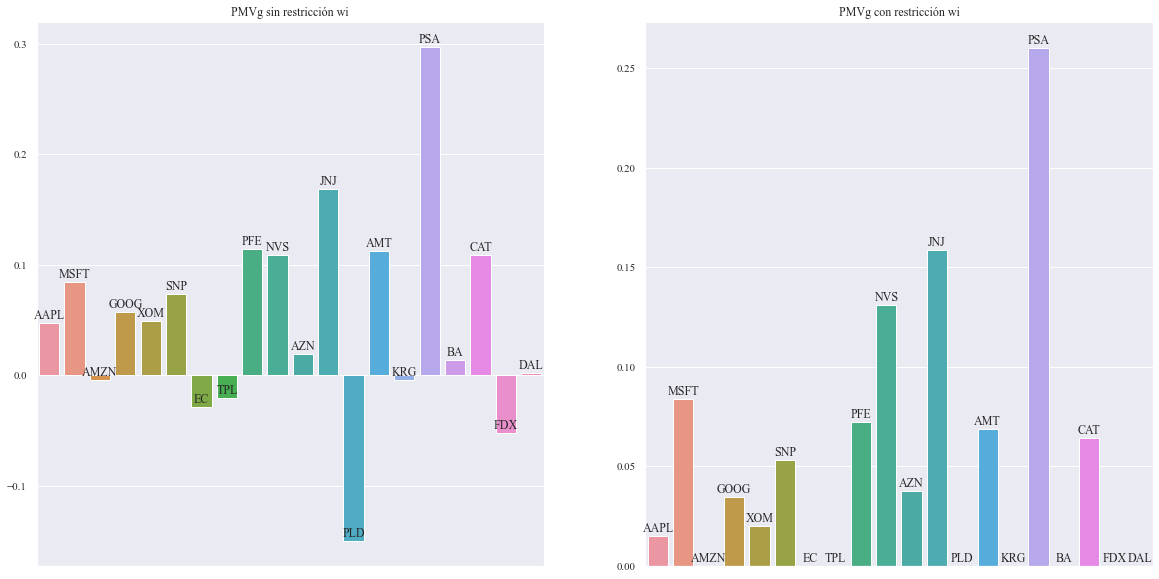

In [31]:
## Resultados de la optimización 

## portafolio de mínima varianza global con y sin restricciones
solv_nwi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpmv, inequality=False)
solv_wi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpmv, inequality=True)

fig, axes = plt.subplots(1,2,figsize=(20,10))
ax1 = sns.barplot(ax=axes[0],x=returns.columns,y=solv_nwi)
for p,name in zip(ax1.patches,returns.columns):
    ax1.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
ax1.set_title('PMVg sin restricción wi')
ax1.set(xticklabels=[])

ax2 = sns.barplot(ax=axes[1],x=returns.columns,y=solv_wi)
for p,name in zip(ax2.patches,returns.columns):
    ax2.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
axes[1].set_title('PMVg con restricción wi')
ax2.set(xticklabels=[])
plt.show()

### Ponderaciones negativas

#### Portafolio óptimo de Sharpe

In [35]:
########################################################################
## Introducción del activo libre de riesgo
rf = 0 
er = mu - rf
zi = np.linalg.solve(vcov,er)

wpt = np.squeeze(np.asarray(zi / sum(zi))) # "portafolio óptimo de sharpe"

##### 
# Rentabilidad y riesgo del portafolio óptimo
rpt = np.asarray(wpt @ mu).reshape(-1)
sigmapt = np.asarray(np.sqrt(wpt @ vcov @ wpt)).reshape(-1)


In [36]:
print(f"""
Matriz de varianzas y covarianzas
----------------------------------
{vcov}

Retorno esperado de los n activos
----------------------------------
{mu}

Portafolio de mínima varianza o retorno objetivo
----------------------------------
{rpt}
""")


Matriz de varianzas y covarianzas
----------------------------------
[[ 0.00621375  0.00224153  0.00252986  0.00171402  0.00107995  0.0005924
   0.00265926  0.00358259  0.00094841  0.00078919  0.00102608  0.00102952
   0.0014178   0.0009701   0.00140544  0.00028831  0.00163166  0.00117223
   0.00206534  0.00105642]
 [ 0.00224153  0.00336009  0.00214808  0.00175498  0.00103544  0.00108397
   0.0017288   0.00234432  0.00053832  0.00063187  0.00069217  0.00087423
   0.00122657  0.00104062  0.00100686  0.00026547  0.00122496  0.00160002
   0.00150646  0.00122216]
 [ 0.00252986  0.00214808  0.00636047  0.00242033  0.00086829  0.00178597
   0.00224553  0.00292267  0.00155912  0.00091882  0.00096772  0.00102997
   0.00180655  0.00108187  0.00096181  0.00023834  0.00173884  0.00147434
   0.00215553  0.00114346]
 [ 0.00171402  0.00175498  0.00242033  0.00382142  0.00136443  0.00059175
   0.00145383  0.00260611  0.00096222  0.00077523  0.00079017  0.00073632
   0.00140482  0.00090306  0.0015803

     pcost       dcost       gap    pres   dres
 0:  4.7729e-04  6.2777e-04  1e-02  1e+00  5e-16
 1:  4.7969e-04  6.3135e-04  1e-04  3e-02  1e-17
 2:  5.5642e-04  8.4334e-04  1e-05  1e-02  5e-18
 3:  1.1118e-03  1.0896e-03  2e-05  3e-05  3e-17
 4:  1.0899e-03  1.0897e-03  2e-07  3e-07  2e-18
 5:  1.0897e-03  1.0897e-03  4e-09  3e-09  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.8592e-04 -8.8323e-01  2e+01  5e+00  9e+00
 1:  7.1112e-03 -2.5351e+00  1e+01  2e+00  4e+00
 2:  2.1450e-01 -2.7028e+00  3e+00  4e-01  8e-01
 3:  1.3441e-01 -1.2811e-01  3e-01  3e-15  1e-16
 4:  2.0561e-02 -1.7722e-02  4e-02  2e-15  2e-17
 5:  3.5465e-03 -1.7487e-03  5e-03  2e-15  8e-18
 6:  1.9831e-03  7.0973e-04  1e-03  2e-16  4e-18
 7:  1.5412e-03  1.3142e-03  2e-04  1e-16  8e-18
 8:  1.4546e-03  1.4344e-03  2e-05  1e-16  2e-17
 9:  1.4448e-03  1.4438e-03  9e-07  1e-16  2e-16
10:  1.4443e-03  1.4443e-03  7e-08  8e-17  2e-15
Optimal solution found.


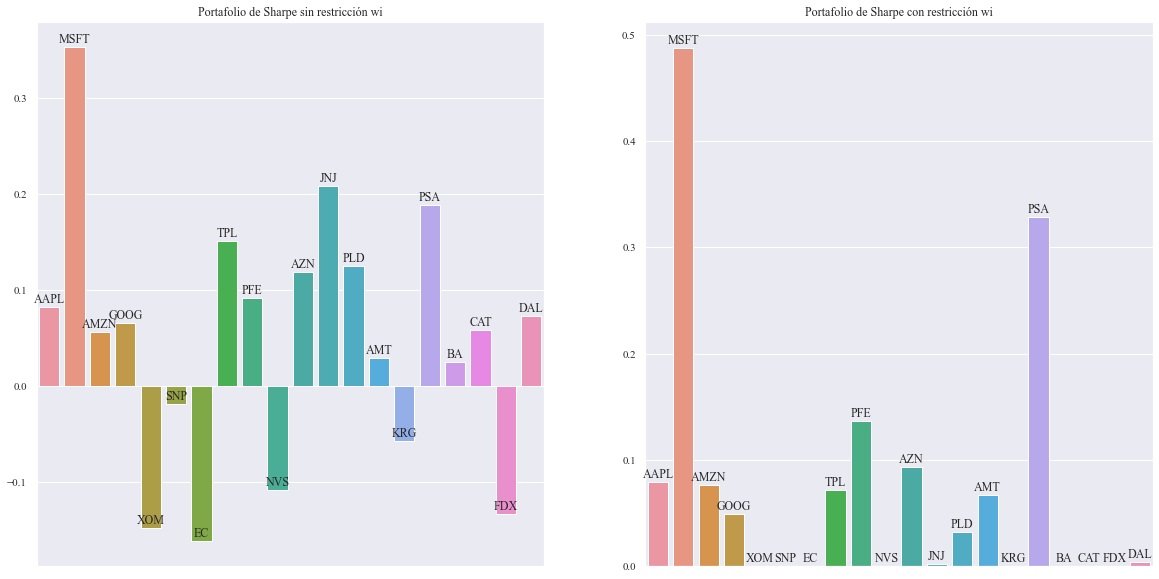

In [39]:
solv_nwi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=False)
solv_wi = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=rpt, inequality=True)

fig, axes = plt.subplots(1,2,figsize=(20,10))
ax1 = sns.barplot(ax=axes[0],x=returns.columns,y=solv_nwi)
for p,name in zip(ax1.patches,returns.columns):
    ax1.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
ax1.set(xticklabels=[])
ax1.set_title('Portafolio de Sharpe sin restricción wi')

ax2 = sns.barplot(ax=axes[1],x=returns.columns,y=solv_wi)
for p,name in zip(ax2.patches,returns.columns):
    ax2.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
ax2.set(xticklabels=[])
ax2.set_title('Portafolio de Sharpe con restricción wi')
plt.show()

#### Portafolio objetivo, portafolio de Sharpe y PMVg
Rtarget

In [40]:
Rtarget =  np.mean(returns.agg(np.mean))

     pcost       dcost       gap    pres   dres
 0:  7.8575e-04 -8.9796e-01  2e+01  5e+00  9e+00
 1:  7.1095e-03 -2.5498e+00  1e+01  2e+00  4e+00
 2:  2.1429e-01 -2.7060e+00  3e+00  4e-01  8e-01
 3:  1.3354e-01 -1.2996e-01  3e-01  2e-15  1e-16
 4:  2.0022e-02 -1.8548e-02  4e-02  3e-15  2e-17
 5:  3.1497e-03 -2.4363e-03  6e-03  2e-16  7e-18
 6:  6.2391e-04 -8.0820e-05  7e-04  4e-16  3e-18
 7:  6.2143e-04  3.7651e-04  2e-04  8e-17  2e-18
 8:  5.0979e-04  4.7751e-04  3e-05  7e-17  1e-18
 9:  4.9405e-04  4.9124e-04  3e-06  1e-16  3e-18
10:  4.9235e-04  4.9218e-04  2e-07  3e-16  3e-17
11:  4.9222e-04  4.9221e-04  2e-09  7e-17  9e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.6517e-04  4.6752e-04  2e-03  1e+00  4e-16
 1:  4.6581e-04  4.6752e-04  2e-05  2e-02  6e-18
 2:  4.6608e-04  4.6785e-04  1e-06  2e-03  9e-19
 3:  4.8174e-04  4.7001e-04  1e-05  4e-16  3e-17
 4:  4.7315e-04  4.7207e-04  1e-06  2e-18  6e-17
 5:  4.7212e-04  4.7211e-04  2e-08  2e-16  2e-1

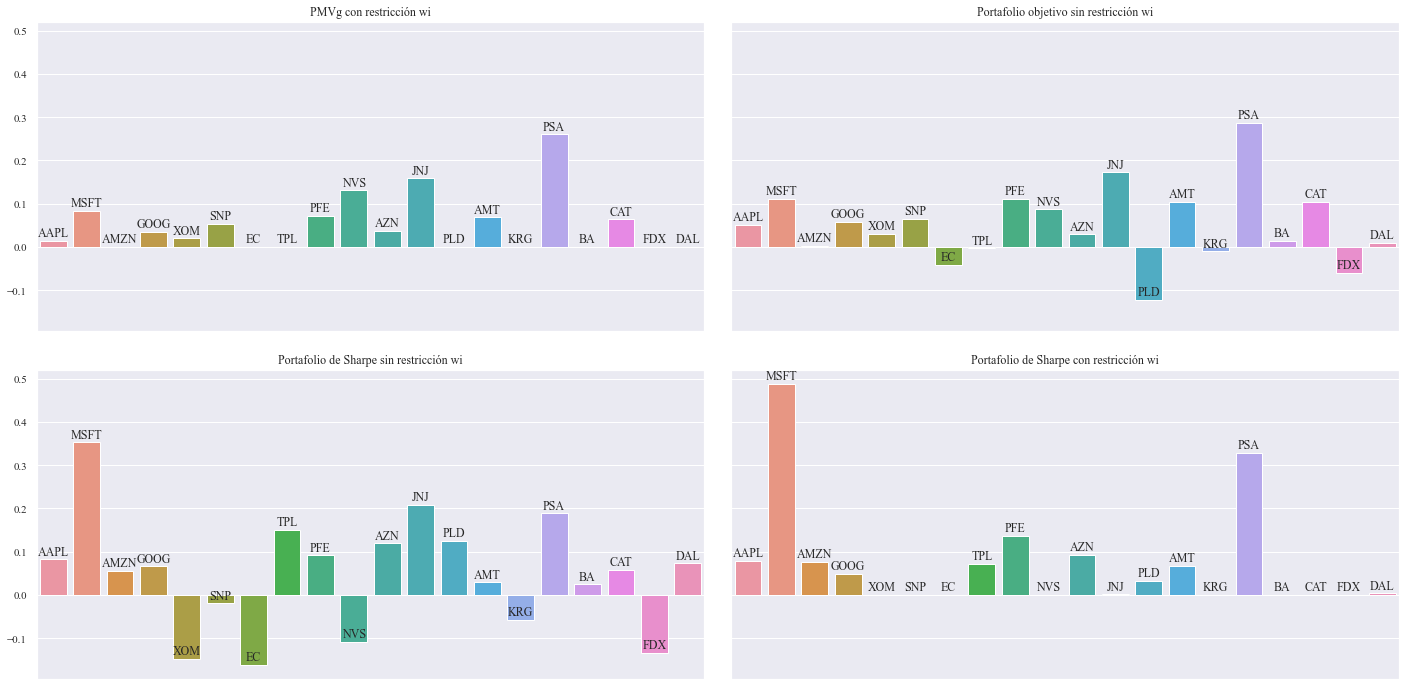

In [45]:
#### Resumen
solv_nwi_pmv = solvers_qp(vcov   = vcov, mu = mu, optimal_portfolio=rpmv, inequality=True)
solv_wi_target = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=np.array([Rtarget]), inequality=False)
solv_nwi_ps = solvers_qp(vcov    = vcov, mu = mu, optimal_portfolio=rpt, inequality=False)
solv_wi_ps = solvers_qp(vcov     = vcov, mu = mu, optimal_portfolio=rpt, inequality=True)

#PMVg con restricción
fig, axes = plt.subplots(2,2,figsize=(20,10), sharey=True)
ax1 = sns.barplot(ax=axes[0,0],x=returns.columns,y=solv_nwi_pmv)
for p,name in zip(ax1.patches,returns.columns):
    ax1.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
ax1.set(xticklabels=[])
ax1.set_title('PMVg con restricción wi')

#Portafolio objetivo sin restricción
ax2 = sns.barplot(ax=axes[0,1],x=returns.columns,y=solv_wi_target)
for p,name in zip(ax2.patches,returns.columns):
    ax2.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
ax2.set(xticklabels=[])
ax2.set_title('Portafolio objetivo sin restricción wi')

#Portafolio de sharpe sin restricción
ax3 = sns.barplot(ax=axes[1,0],x=returns.columns,y=solv_nwi_ps)
for p,name in zip(ax3.patches,returns.columns):
    ax3.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
ax3.set(xticklabels=[])
ax3.set_title('Portafolio de Sharpe sin restricción wi')

#Portafolio de Sharpe con restricción
ax4 = sns.barplot(ax=axes[1,1],x=returns.columns,y=solv_wi_ps)
for p,name in zip(ax4.patches,returns.columns):
    ax4.annotate(name,(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
ax4.set(xticklabels=[])
ax4.set_title('Portafolio de Sharpe con restricción wi')
fig.tight_layout(pad=2.0)
plt.show()

# Desempeño de los portafolios
## Backtesting con datos al interior de la muestra

In [46]:
# rendimiendo de los portafolios con una inversión de USD $ 30 millones
capital = 30

In [52]:
# Retornos históricos del portafolio óptimo de sharpe
# Sin restricción 

# ((No se incluye en el parcial))
# t = returns.shape[0]
# op_nwi_ps = np.array(np.matrix(returns) @ solv_nwi_ps).reshape(-1)
# port_sharpe1 = []
# for i in range(t):
#     if i == 0:
#         port_sharpe1.append(capital)
#     else:
#         port_sharpe1.append(port_sharpe1[i-1]*np.exp(op_nwi_ps[i-1]))


# Portafolio de sharpe con restricción
t = returns.shape[0]
op_wi_ps = np.array(np.matrix(returns) @ solv_wi_ps).reshape(-1)
port_sharpe2 = []
for i in range(t):
    if i == 0:
        port_sharpe2.append(capital)
    else:
        port_sharpe2.append(port_sharpe2[i-1]*np.exp(op_wi_ps[i-1]))

#Retornos históricos del portafolio de mínima varianza global
t = returns.shape[0]
op_nwi_pmv = np.array(np.matrix(returns) @ solv_nwi_pmv).reshape(-1)
port_pmv = []
for i in range(i):
    if i == 0:
        port_pmv.append(capital)
    else:
        port_pmv.append(port_pmv[i-1]*np.exp(op_nwi_pmv[i-1]))



#Retornos históricos de mi portafolio objetivo con restricción
solv_wi_target = solvers_qp(vcov = vcov, mu = mu, optimal_portfolio=np.array([Rtarget]), inequality=True)
t = returns.shape[0]
op_wi_target = np.array(np.matrix(returns) @ solv_wi_target).reshape(-1)
port_target = []
for i in range(t):
    if i == 0:
        port_target.append(capital)
    else:
        port_target.append(port_target[i-1]*np.exp(op_wi_target[i-1]))


     pcost       dcost       gap    pres   dres
 0:  7.8577e-04 -8.9651e-01  2e+01  5e+00  9e+00
 1:  7.1097e-03 -2.5484e+00  1e+01  2e+00  4e+00
 2:  2.1431e-01 -2.7057e+00  3e+00  4e-01  8e-01
 3:  1.3362e-01 -1.2980e-01  3e-01  1e-15  1e-16
 4:  2.0067e-02 -1.8484e-02  4e-02  4e-15  3e-17
 5:  3.1755e-03 -2.3980e-03  6e-03  2e-16  1e-17
 6:  6.4861e-04 -3.8700e-05  7e-04  3e-16  4e-18
 7:  5.8586e-04  4.1569e-04  2e-04  7e-17  1e-18
 8:  5.0685e-04  4.8396e-04  2e-05  9e-17  3e-18
 9:  4.9766e-04  4.9510e-04  3e-06  1e-16  6e-18
10:  4.9636e-04  4.9615e-04  2e-07  1e-16  5e-17
11:  4.9625e-04  4.9623e-04  2e-08  9e-17  5e-16
Optimal solution found.


## Índice comparativo

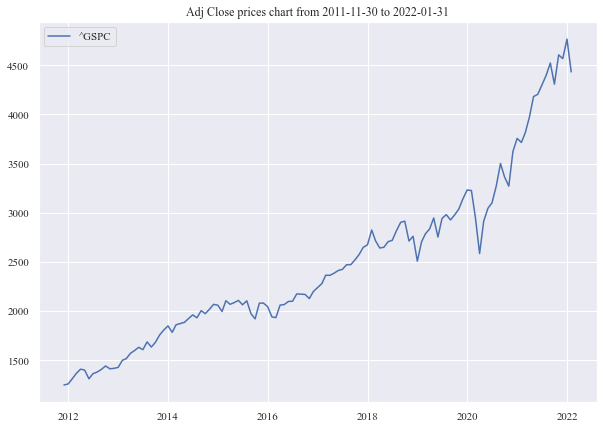

In [53]:
## rendimiento del S&P500
syp_500 = get_data(symbols=['^GSPC'],start_date="2011-11-30",end_date="2022-01-31",frequency='M').prices(plot={'draw':True,'standarise':False})

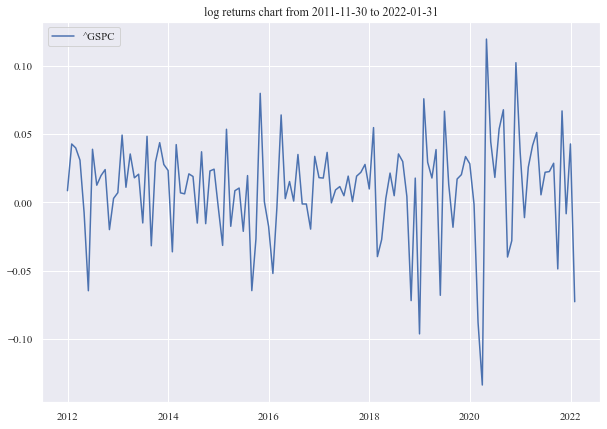

In [54]:
syp_500_returns = get_data(symbols=['^GSPC'],start_date="2011-11-30",end_date="2022-01-31",frequency='M').returns(plot=True,return_type='log')

In [55]:
# Backtesting del índice con una inversión de USD $ 30 millones
port_indice = []
for i in range(t):
    if i == 0:
        port_indice.append(capital)
    else:
        port_indice.append(port_indice[i-1]*np.exp(syp_500_returns.iloc[0][0]))

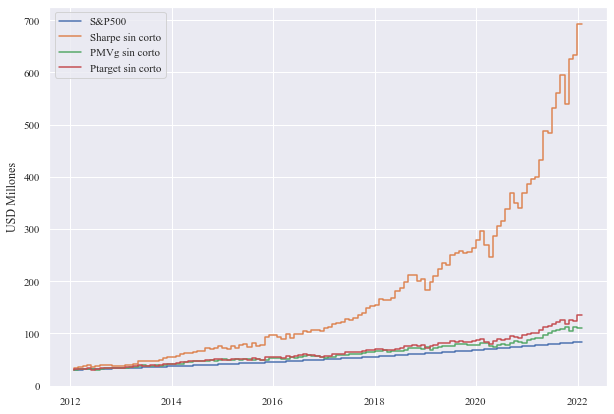

In [57]:

dates = syp_500.index[2:]
fig = plt.figure(figsize=(10,7))
sns.lineplot(x=dates,y=port_indice[1:],label='S&P500',drawstyle='steps-pre')
# sns.lineplot(x=dates,y=port_sharpe1[1:],label='Sharpe corto',drawstyle='steps-pre') No se incluye en el parcial
sns.lineplot(x=dates,y=port_sharpe2[1:],label='Sharpe sin corto',drawstyle='steps-pre') 
sns.lineplot(x=dates,y=port_pmv,label='PMVg sin corto',drawstyle='steps-pre')
sns.lineplot(x=dates,y=port_target[1:],label='Ptarget sin corto',drawstyle='steps-pre')
plt.ylabel('USD Millones')
plt.legend(loc='upper left')
plt.show()

## Tabla resumen

In [59]:
#suponiendo una tasa libre de riesgo = 0
rf = 0
port_indice = pd.Series(port_indice)
port_sharpe2 = pd.Series(port_sharpe2)
port_pmv = pd.Series(port_pmv)
port_target = pd.Series(port_target)

res_retorno = pd.DataFrame({
    'Retorno' : [port_indice.mean(),port_sharpe2.mean(),port_pmv.mean(),port_target.mean()],
    'Riesgo' : [port_indice.std(),port_sharpe2.std(),port_pmv.std(),port_target.std()],
    'Sharpe Ratio' : [(port_indice.mean()-rf)/port_indice.std(),
                (port_sharpe2.mean()-rf)/port_sharpe2.std(),
                (port_pmv.mean()-rf)/port_pmv.std(),
                (port_target.mean()-rf)/port_target.std()],
}, index=['Índice','Sharpe sin cortos','PMVg sin cortos','Ptarget sin cortos'])
res_retorno

,Retorno,Riesgo,Sharpe
Índice,52.437041,15.616960,3.357698
Sharpe sin cortos,172.531266,151.446284,1.139224
PMVg sin cortos,60.907922,20.748781,2.935494
Ptarget sin cortos,64.987950,24.997029,2.599827


## Explicación de resultados

Se escogieron activos con una correlación de los retornos inferior al 0.7, sin embargo, pocos de ellos están inversamente o negativamente correlacionados, no obstante, de la tabla resumen ``res_retorno`` se puede observar que el **portafolio óptimo de sharpe sin cortos** presenta el mayor retorno pero también es el que mayor riesgo tiene con el menor Sharpe Ratio; esto último nos indica que es el portafolio que menor rentabilidad da por cada unidad de riesgo. Se recomendaría para inversores y fondos amantes del riesgo.

A pesar de que el Índice es el portafolio que mayor Sharpe ratio presenta, el PMVg genera un retorno más alto de igual manera el Portafolio objetivo, en ese sentido la elección de cada uno depende del perfil del riesgo de cada inversor, siendo el más conservador el índice y el más riesgoso el Portafolio objetivo.

# Miguel Angel Manrique Rodriguez